<a href="https://colab.research.google.com/github/paulagm12/DSPS_PGalvezMolina/blob/main/HW3_PGalvezMolina/HW3_PGalvezMolina_KS_earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by FedericaBBianco @fedhere for DSPS/MLNPS
# Kolmogorov Smirnoff test, application to earthquake data

In [ ]:
#all the imports I needed
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats
%pylab inline
#pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


This homework asks you to reproduce the work in [Corral 2018](https://arxiv.org/pdf/0910.0055.pdf) which is well described, but not "reproducible".
Corral 2018 uses a K-S test to show that at different magnitude scales the time gaps between earthquakes follows the same distribution. If true, this indicates that there is a consistent scaling law.

The argument is a little convoluted, but it is a somewhat innovative use of the test. Corall compares the time gap between earthquakes  greater than a certain magnitude threshold with the time gaps between earthquakes above a different threshold, and finds no differences.

Remind yourself exactly what the K-S test is about :

    1 What is the test's Null Hypothsis that the K-S test tests?
    
    


The K-S test aims to answer the question "Do two samples come from the same parent distribution?". Thus, the Null Hypothesis is that both samples come from the same distribution (i.e. $d_{12} ≈ 0$).


    2 What is the "statistic" or "pivotal quantity" that the test uses?
    


The statistic (pivotal quantity) the K-S test uses is the maximum distance $d_{12}$" between the two cumulative distribution functions (cdf) plots of the two samples at test ($C_1(x), C_2(x)$). Namely
$d_{12} = \text{max}|C_1(x) - C_2(x)|$

For Corral's paper, it is important that both cdf are rescaled.

    3 What does the probability distribution of this statistic depend on?
    
   


The probability distribution of this statistic only depends on the number of data N in each of the sets. The paper proposes:
$p = \text{Prob} |\text{KS statistic}>d| = Q([\sqrt{N_e} + 0.12+0.11/\sqrt{N_e}]d)$ where $N_e$ is the effective number of data points.

# Data Retrival

The first reason why the paper is not techincally _reproducible_ is that, while a link is provided to retrieve the data, the link is dead. This happens often. Services like [Zenodo](https://zenodo.org/) or journals that serve data provide some insurance against this but unfortunately the standards are not strict.

You can retrieve the data yourself from [this website](http://service.scedc.caltech.edu/eq-catalogs/poly.php). Think about what setting up data like this means for reproducibility. Did the author comply to reproducibility standards?__

No, I do not think that the author complied with reproducibility standards as the same data set should be accessible to reproduce the results. So, if the data is not available, results cannot be exactly
reproduced.

Make sure the number of entries in your final dataset is similar to that of the authors. I got 70798, instead of 77000. 10% off, which I deem close enough. You should get something similar. Use the map in the paper to determine the region of interest. Call the file earthquakes_\<firstinitialLastname\>.csv and upload it to your github repository. Read it your file, instead of mine as instructed below. If you are getting weird results compare to what I got, go back and check how the files differ.

We used the latitude and longitude (value from the paper -360) from the paper by [Shearer, et. al](https://watermark.silverchair.com/904_953_04168.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAzIwggMuBgkqhkiG9w0BBwagggMfMIIDGwIBADCCAxQGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQM5xpDaAj4DSSRMRsOAgEQgIIC5SQVilTJYqGc7dtMjWCHF1bxewXutzcybL9l-J0JAO8T1s04JPSdEinHNlP2OEjatj5uFkFyi0qoxcu_rOeY-EICGnYx6JaA4y24AfvSoU6OO7VvwQaUj3iMYGYi3vGnBiwxD-NnwNNMzEjTjz1ff5cjnelyYkSftn61NUfBms56FtEOmAWMF14jzEk1yscMGqZPE668HFKyVpdzhAsGVt0nUyFVcWHgTMOo1_CJSz-vKyJUVI7UvkzY3w515HW94qmGZ6TI4fd32_W_ptDVJRubl1SCciXwLeJCO4m6qsVqY8Sc0rZOc9w7bfta7RlvdKJU0i3uU-DmsrPggraYh5CQoVO3g3icMRRDnbmsOgKGN8KelGLqQOnOm6SolTfy1j74pMiBnclTra7uY8EQL7cdIA61AYCkXwr6Bd9zR67i70KmVnp26vS9XI7TauowQlQZAuj7TOzB2KHJ0U5mFWYoL_8Xv_JfV80xI0ypuFoFkGsSFNo7eygq7JTwdZ5LvphF9xF80_ZSfh46Gu44PpggDCjSucWJCiPVoXrazb-1S87UifZ2JjF7qnoYH9md4xLfR7KYNWMlaKH6no-LAyaZqwgo42TCMfyOo8f9gmGVtor3BVccNk-3fffthDwDcVN7R93kusSBbUMy6KN6Kt3_jzq5D_jjca9a21Hi_evWnxjkfUejiQ3JyLA-vdDre66hIAf7csc2YCqqEoqplKPjlxvj1JfzLmlxJyvlw2TZ3OT7Q_dE0ljD4QX1JykuY9909F6M2Sz-HvojxOOzFblhHAiMabi651Q9M7upXxrn1Fx8_ESIpjBFO-E66BsjMgQ3VA2CF04t1nXoejM4Buni7AYTnyS8_cU9tzS_NkFNuDJbIOhfPb1aq9bPEhnUHlcL4bPJeCzxIwIt1HWa1xyOrOlfr4u5XD2iVELilwbAB_Cn4dUXqdhwJKf6Aepx61ioUSe7Hx5uVLjItuf-BvIiurF61g) (referenced in Corral's paper).

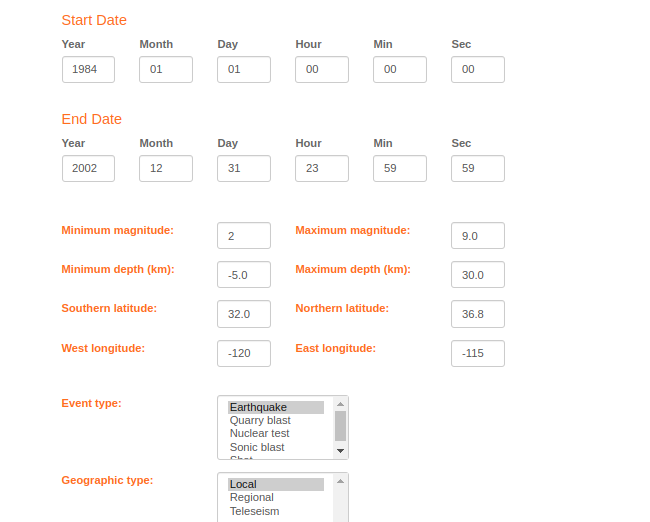

# Data Ingestion

## read in data

I saved the data in a file called "earthquakes.csv", where ```csv``` stands for "comma separated file". [This file format](https://www.howtogeek.com/348960/what-is-a-csv-file-and-how-do-i-open-it/) requires different entries in a row to be separated by commas alone (no space) and for commas to be used in quote if they are not intended to separate entries.

```
a,b,c
d,e,f
g,"h,2",i
```
The data is uploaded on the  github homework repository but to read it in you will need to get the link to the *raw file*: the link to the file earthquakes.csv which is in my GitHub repository https://github.com/fedhere/DSPS_FBianco/tree/main/data takes you to an ```html``` page that includes the content of the file, but you want to isolate the content of the file itself: the _raw file_. Pay attention to this: from the next time I will not give you the exact link, I will just point you to the file and you will have to find the link to the raw data from there. (remember to use the "raw" link)

The data can be read effectively using the _pandas_ python package as ```pandas.read_csv(<file name or URL>)```.

However, I did not format the data correctly, according to the csv extension requirement. This happens all the time. Look at the file and use the pandas documentation to figure out how to read it with ```pd.read_csv()```

In [ ]:
# eqs stands for earthquakes
eqs = pd.read_csv("https://raw.githubusercontent.com/paulagm12/DSPS_PGalvezMolina/main/Paulas_SearchResults.csv",
                  delimiter=" ",skipinitialspace=True, header=2, skipfooter=2)

<ipython-input-45-083e73d7668b>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  eqs = pd.read_csv("https://raw.githubusercontent.com/paulagm12/DSPS_PGalvezMolina/main/Paulas_SearchResults.csv",


running the following lines of code should give you the same result as mine if you used the file I provided (467 students), and qualitatively  similar if you are using your own data (667 students)

In [ ]:
eqs.shape

(72219, 13)

In [ ]:
eqs.head()

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.944,-118.322,-1.4,C,28546,29,56


In [ ]:
eqs.describe()

,MAG,LAT,LON,DEPTH,EVID,NPH,NGRM
count,72219.000000,72219.000000,72219.000000,72219.000000,7.221900e+04,72219.000000,72219.000000
mean,2.411115,34.132841,-116.894707,5.090005,3.760891e+06,32.013418,187.135144
std,0.405422,1.006836,0.981488,4.249939,3.430413e+06,22.353288,231.126929
min,2.000000,32.000000,-120.000000,-2.100000,2.825500e+04,0.000000,0.000000
25%,2.120000,33.450500,-117.659000,2.100000,7.473185e+05,17.000000,67.000000
50%,2.300000,34.153000,-116.624000,4.800000,3.054247e+06,26.000000,124.000000
75%,2.570000,34.622000,-116.299000,6.800000,3.324612e+06,41.000000,230.000000
max,7.300000,36.795000,-115.000000,29.300000,3.736673e+07,406.000000,3815.000000


now that you have a dataframe object you can use methods of the object to modify it. Use the method ```eqdata.rename``` to change the names of the 3 columns that are the only three relevant to us: _date, time, magnitude_

## prepare date-time column

In [ ]:
eqs.rename({"#YYY/MM/DD": "date",
            "HH:mm:SS.ss": "time",
            "MAG":"mag"},axis=1,inplace=True)

In [ ]:
eqs.head()

,date,time,ET,GT,mag,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.944,-118.322,-1.4,C,28546,29,56


In [ ]:
eqs.describe()

,mag,LAT,LON,DEPTH,EVID,NPH,NGRM
count,72219.000000,72219.000000,72219.000000,72219.000000,7.221900e+04,72219.000000,72219.000000
mean,2.411115,34.132841,-116.894707,5.090005,3.760891e+06,32.013418,187.135144
std,0.405422,1.006836,0.981488,4.249939,3.430413e+06,22.353288,231.126929
min,2.000000,32.000000,-120.000000,-2.100000,2.825500e+04,0.000000,0.000000
25%,2.120000,33.450500,-117.659000,2.100000,7.473185e+05,17.000000,67.000000
50%,2.300000,34.153000,-116.624000,4.800000,3.054247e+06,26.000000,124.000000
75%,2.570000,34.622000,-116.299000,6.800000,3.324612e+06,41.000000,230.000000
max,7.300000,36.795000,-115.000000,29.300000,3.736673e+07,406.000000,3815.000000


Now you want to combine the columns containing date and time and convert them to a "datetime" kind of data object.


What data type are the _time_ and _date_ columns right now? What type you want them to be to conver them to datetime with ```pd.datetime()```? type 'O' means object, typically a string.

In [ ]:
eqs.time.dtype, eqs.date.dtype

(dtype('O'), dtype('O'))

to do this conversion I

   1. joined date and time into a single string for each row with a ["list comprehension"](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) (essentially a for loop but more efficient and compact). You do not have to do it with a list comprehension, you can use just a for loop.

   2. used pd.datetime() to convert the resulting new dataframe column into a dataframe column containing _datetime_ objects (see lab)

   3. but this did not work because of the formatting of some dates, so I had to go back and fix 5 entries. (you are on your own to figure out this one)

In [ ]:
eqs["datetime"] = [eqs.iloc[i]["date"]+" "+eqs.iloc[i]["time"] for i in range(len(eqs))]
                   #now we have date time objects

newdtcol = [] #this code is from sid thank u sid!

for dt in eqs["datetime"]:
  mins = int(dt[14:16])
  secs = int(dt[17:19])

  if secs==60:
    newsecs = secs - 60
    newmins = mins + 1

    newdt = dt[:14] + str(newmins) + dt[16] + str(newsecs) + dt[19:]

  else:
    newdt = dt

  newdtcol.append(newdt)

eqs["datetime"] = newdtcol

eqs["datetime"] = pd.to_datetime(eqs["datetime"])

In [ ]:
eqs.head()

,date,time,ET,GT,mag,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM,datetime
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40,1984-01-01 11:10:25.290
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.944,-118.322,-1.4,C,28546,29,56,1984-01-01 13:50:47.620


## select valuable data

Following the description in Section 2  of Corral 2018 I removed all data that did not belong to a "stationary" period. Third paragraph section 2 of Corral 2018. You can see the cell of code I used to do this [here](https://github.com/fedhere/DSPS_FBianco/blob/master/HW3/Corral2018_selectStationary.py) at no points cost, cause it was a bit tricky, but I encourage you to try and do it yourself. If you can do it in fewer lines than I did its automatically +5 points (just turning the loop into a list comprehension does not count. That is an obvious way to decrease the number of lines of code; I did not do it simply to enhance readability.)

In [ ]:
# create empty container
ss = []

# loop through all year pairs as year and fraction of year
for t in [(1984, 1986.5),
          (1990.3, 1992.1),
          (1994.6, 1995.6),
          (1996.1,1996.5),
          (1997,1997.6),
          (1997.75,1998.15),
          (1998.25,1999.35),
          (2000.55,2000.8),
          (2000.9 ,2001.25),
          (2001.6 ,2002),
          (2002.5 ,2003)]:

    # for each pair I convert the year to datetime (easy)
    # then I convert the fraction of year and convert it to days and convert that to a delta-time
    # finally I add that deltatime to the year datetime.
    ss.append((pd.to_datetime(int(t[0]), format="%Y")
        + pd.Timedelta('%.f days'%((t[0] - int(t[0])) * 365.25)),
               pd.to_datetime(int(t[1]), format="%Y")
        + pd.Timedelta('%.f days'%((t[1] - int(t[1])) * 365.25))))


In [ ]:
print ("the {} timestamp pairs that are the boundaries of good data periods are:".format(len(ss)))
ss


the 11 timestamp pairs that are the boundaries of good data periods are:


[(Timestamp('1984-01-01 00:00:00'), Timestamp('1986-07-03 00:00:00')),
 (Timestamp('1990-04-21 00:00:00'), Timestamp('1992-02-07 00:00:00')),
 (Timestamp('1994-08-08 00:00:00'), Timestamp('1995-08-08 00:00:00')),
 (Timestamp('1996-02-07 00:00:00'), Timestamp('1996-07-02 00:00:00')),
 (Timestamp('1997-01-01 00:00:00'), Timestamp('1997-08-08 00:00:00')),
 (Timestamp('1997-10-02 00:00:00'), Timestamp('1998-02-25 00:00:00')),
 (Timestamp('1998-04-02 00:00:00'), Timestamp('1999-05-09 00:00:00')),
 (Timestamp('2000-07-20 00:00:00'), Timestamp('2000-10-19 00:00:00')),
 (Timestamp('2000-11-25 00:00:00'), Timestamp('2001-04-02 00:00:00')),
 (Timestamp('2001-08-08 00:00:00'), Timestamp('2002-01-01 00:00:00')),
 (Timestamp('2002-07-03 00:00:00'), Timestamp('2003-01-01 00:00:00'))]

In [ ]:
# data between start and end of first time period
gooddates = (((eqs.datetime >= ss[0][0]) * (eqs.datetime <= ss[0][1])) +\
        # data between start and end of second time period
        ((eqs.datetime >=ss [1][0]) * (eqs.datetime <= ss[1][1])) +\
        ((eqs.datetime >=ss [2][0]) * (eqs.datetime <= ss[2][1])) +\
        ((eqs.datetime >=ss [3][0]) * (eqs.datetime <= ss[3][1])) +\
        ((eqs.datetime >=ss [4][0]) * (eqs.datetime <= ss[4][1])) +\
        ((eqs.datetime >=ss [5][0]) * (eqs.datetime <= ss[5][1])) +\
        ((eqs.datetime >=ss [6][0]) * (eqs.datetime <= ss[6][1])) +\
        ((eqs.datetime >=ss [7][0]) * (eqs.datetime <= ss[7][1])) +\
        ((eqs.datetime >=ss [8][0]) * (eqs.datetime <= ss[8][1])) +\
        ((eqs.datetime >=ss [9][0]) * (eqs.datetime <= ss[9][1])) +\
        # data between start and end of last time period
        ((eqs.datetime >=ss [10][0]) * (eqs.datetime <= ss[10][1])\
        ).values)
gooddates

0        True
1        True
2        True
3        True
4        True
         ... 
72214    True
72215    True
72216    True
72217    True
72218    True
Name: datetime, Length: 72219, dtype: bool

The following cell of code shows you the array of bool values (True/False) which I create to use as an index to the input array: when used as an index, a technique called "broadcasting" in python, will select only elements of the original array where the index array value is True. something like
Try:



In [ ]:
a = np.array([0, 1, 2, 9, -7])
a, a[[True, False, True, True, True]]

(array([ 0,  1,  2,  9, -7]), array([ 0,  2,  9, -7]))

For each of the 11 valid periods I create a condition
``` datetime >= period_start AND datetime <= period_end ``` where AND is a product of booleans: True * False = False.

I want to take all chinks of data that satisfy this condition for any of the 11 chunks of time so that is a logical OR operator, or a sum of Booleans: True + False = True

This is because ```True``` really corresponds to "not 0" and False to "0". So ```"not 0" * 0 = 0``` and ```"not 0" + 0 = not 0```
    

In [ ]:
eqGoodData = eqs[gooddates]

In [ ]:
print ("there are {} earthquakes falling in the selected stationary periods".
       format(gooddates.sum()))

there are 16941 earthquakes falling in the selected stationary periods


In [ ]:
eqGoodData.shape

(16941, 14)

In [ ]:
eqGoodData.head()

,date,time,ET,GT,mag,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM,datetime
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40,1984-01-01 11:10:25.290
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.944,-118.322,-1.4,C,28546,29,56,1984-01-01 13:50:47.620


Now what you really want is the _time interval between earthquakes_ for all events greater than some magnitude m, while all you have are the date and time of the events.:

You can remove earthquakes smaller than magnitude 2 by, again, broadcasting. How would that look like?

We do not need to do this as we filtered all the earthquakes whose magnitude was less than 2 from the data retrieval.

In [ ]:
eqGoodData.shape #look like for my data it was not needed! that is because I chose M>2 when when I downloaded the data

(16941, 14)

You can get the time between consecutive earthquakes with the method ```diff()``` of numpy arrays (in a pandas series you can get the data as a numpy array with the attribute .values: ```seried.values```).


In [ ]:
time_diff = np.append(None, diff(eqGoodData['datetime'].values))
eqGoodData['time_diff'] = time_diff

<ipython-input-64-d9c75111a2f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eqGoodData['time_diff'] = time_diff


In [ ]:
eqGoodData.shape

(16941, 15)

In [ ]:
eqGoodData.head()

,date,time,ET,GT,mag,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM,datetime,time_diff
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17,1984-01-01 01:30:57.520,None
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42,1984-01-01 05:31:34.160,14436640000000
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30,1984-01-01 06:59:05.140,5250980000000
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40,1984-01-01 11:10:25.290,15080150000000
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.944,-118.322,-1.4,C,28546,29,56,1984-01-01 13:50:47.620,9622330000000


In [ ]:
eqGoodData.describe()

,mag,LAT,LON,DEPTH,EVID,NPH,NGRM
count,16941.000000,16941.000000,16941.000000,16941.000000,1.694100e+04,16941.000000,16941.000000
mean,2.373139,34.057266,-117.080199,6.179948,4.158648e+06,34.349389,193.743404
std,0.378161,1.161609,1.135249,4.449025,4.022844e+06,23.932396,261.741326
min,2.000000,32.000000,-120.000000,-1.900000,2.825500e+04,0.000000,0.000000
25%,2.100000,33.189670,-117.871330,3.400000,1.174150e+05,18.000000,64.000000
50%,2.260000,34.035500,-116.855000,5.500000,3.187291e+06,29.000000,110.000000
75%,2.520000,34.679000,-116.291000,8.200000,9.051971e+06,44.000000,201.000000
max,5.800000,36.795000,-115.001000,27.900000,3.713122e+07,406.000000,3674.000000


Note that the first entry will be NaT which is Not a Time (corresponding to nan for numerical variables) or maybe a negative number (depends on your exact operations above). You should remove it

In [ ]:
eqGoodData.drop(eqGoodData.index[0], inplace = True)

<ipython-input-68-9196cbb5aae9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eqGoodData.drop(eqGoodData.index[0], inplace = True)


In [ ]:
eqGoodData.head()

,date,time,ET,GT,mag,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM,datetime,time_diff
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42,1984-01-01 05:31:34.160,14436640000000
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30,1984-01-01 06:59:05.140,5250980000000
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40,1984-01-01 11:10:25.290,15080150000000
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.944,-118.322,-1.4,C,28546,29,56,1984-01-01 13:50:47.620,9622330000000
5,1984/01/01,19:38:19.79,eq,l,2.13,c,33.963,-116.290,2.7,C,28553,40,49,1984-01-01 19:38:19.790,20852170000000


# data exploration
At this point you should wonder if this is the final dataset that you want to use and if anything is weird or suspicious about it. Visualize the distribution. A good way to visualize distributions is a histogram which you can prodice with pl.hist() or as a method of your dataframe series as ```df[SeriesName].plot(kind="hist")```. Produce a plot like the one below (label the axis! and describe it with a caption!). To get the logarithmic y axis you can se ```logy=True```, for example. in your ```df[SeriesName].plot``` call.

Text(0.5, 0, 'Time difference (ns)')

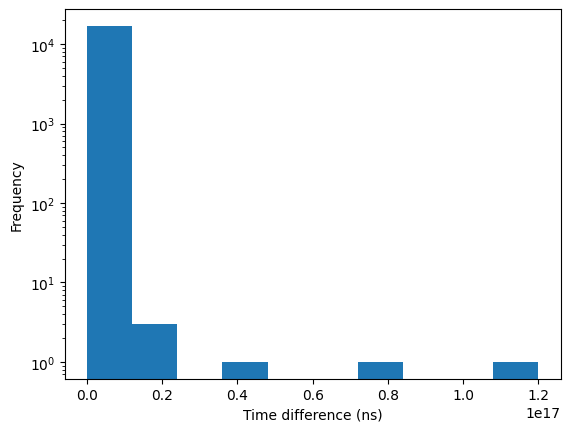

In [ ]:
eqGoodData['time_diff'].plot(kind = "hist", logy = True)
pl.xlabel("Time difference (ns)")

Figure 1. Histogram showing the frequency of different elapsed times (in ns) between two consecutive earthquakes.

The thing that worries me is that by removing some sections of the data to use only stationary periods we created some artificially large gaps: gaps of order ~month. How many nanoseconds in a month? remove all gaps that are larger than about a month and see how the distribution looks (make another histogram).

In [ ]:
keepData = []
nspermonth = 10**9*60*60*24*365.25/12 # Approximate number of nanoseconds in a month
for i in eqGoodData['time_diff']:
  if i  > nspermonth:
    keepData.append(False)
  else:
    keepData.append(True)
eqGoodData = eqGoodData[keepData]

eqGoodData['time_diff'] = eqGoodData['time_diff']/(60*10**9) # Setting time difference in minutes

<ipython-input-71-a23a3d1eb57f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eqGoodData['time_diff'] = eqGoodData['time_diff']/(60*10**9) # Setting time difference in minutes


Text(0.5, 0, 'Time difference (minutes)')

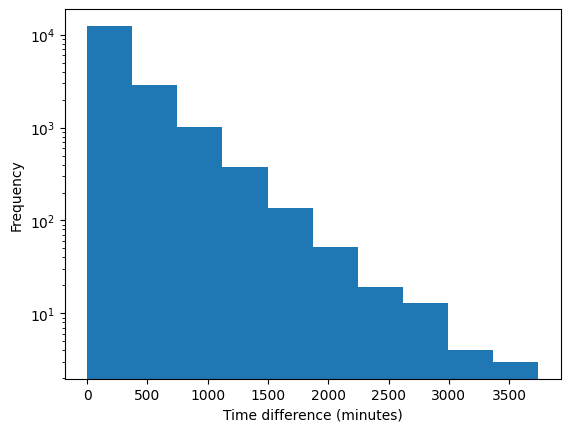

In [ ]:
eqGoodData['time_diff'].plot(kind = "hist", logy = True)
pl.xlabel("Time difference (minutes)")

Figure 2. Histogram showing the frequency of different elapsed times (in ns) between two consecutive earthquakes not considering those events who have a gap greater than 1 month.

# data analysis

### important: the paper does not do it but I want you to formally choose a threshold before you do this test. Choose a p-value (=$\alpha$ thresold: call your variable ```alpha```) of 3-$\sigma$.

In [ ]:
alpha = 0.003

Follow the instructions (algorithm) in **Section 3 paragraph 3** and compare your results with the results in table 1 with a threshold  of = 0.01 and 0.001

Do it for all 5 magnitude thresholds as indicated in the paper (and in Table 1).

Note that the x axis in plot Fig 1 is in _log space_. Use ```np.log10()``` to take the logarithm of the time gaps.

The pseudocode for the algorithm is [here](https://github.com/fedhere/DSPS_FBianco/blob/main/HW3/Corral2018pseudocodeKStest.md).


Reproduce the paper Fig 1 and Table 1. In the Table report the size of each dataset after cleaning the value of the statistic and the p-value, as done in Corral 2018. Use the scipy function for the 2 sample KS test (resources [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0) to learn about the table syntax in markdown)

In [120]:
# I did not use the pseudo-code

# Defining function for data cleaning as per paragraph 3 section 3 in Corral's paper def dataCleaning(sample,m):
# (the second function is the one to use the first one is an intermediary)
def dataReduction(sample, m, column):
  mean = np.mean(sample[column]) #This is <\tau>_k in the paper (i.e. the mean of the interevent time)
  # Eliminate all data points smaller than threshold m by broadcasting method
  sample['normalized'] = sample[column].values / mean
  keepData = sample['normalized'] >= m
  sample = sample[keepData]

  # Repeating the process one more time as indicated in the paper
  return sample

def dataCleaning(sample,m):
  reduced_sample = dataReduction(sample, m, 'time_diff')
  reduced_sample = dataReduction(reduced_sample, m, 'normalized')

  return reduced_sample

In [121]:
# Generate all samples (including x/Rs and P(x/Rs)) for the various values of k and m and store them on a dictionary
k = [2.0, 2.5, 3.0, 3.5, 4.0] # These are the thresholds for the magnitudes
m = [0.01, 0.001]
samples = {} # defines dictionary
samples[0.01] = {} # samples[0.01] is an element of the samples dictionary, itself a dictionary of all samples compared to m = 0.01
samples[0.001] = {} # samples[0.01] is an element of the samples dictionary, itself a dictionary of all samples compared to m = 0.001

for i in m: # iterating over m-values
  for j in k: # iterating over mangitude threshold for the earthquakes
    keepData = eqGoodData['mag'] >= j # Eliminate all events smaller than stipulated magnitude k (i.e. keep only M >= k)
    sample = eqGoodData[keepData]
    samples[i][j] = dataCleaning(sample, i) # Performing data cleaning with m = 1 for sample with events of magnitude greater than k

    # Adding the x and y columns of the P(x/Rs) vs. x/Rs graph
    # samples[i][j]['x/Rs'] = samples[i][j]['time_diff'] / np.mean(samples[i][j]['time_diff']) # Creates column for x axis (time_diff/mean of time_diff)
    # Creates column for y axis (number of events such that x/Rs is less than that of that record diveded by number of records (so it is normalized))
    P_of_x = []
    for element in samples[i][j]['normalized']:
      P_of_x.append((samples[i][j]['normalized'] < element).sum()/len(samples[i][j]['normalized']))
    samples[i][j]['P(x)'] = P_of_x


<ipython-input-120-f126e211b6ed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['normalized'] = sample[column].values / mean
<ipython-input-120-f126e211b6ed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['normalized'] = sample[column].values / mean
<ipython-input-120-f126e211b6ed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

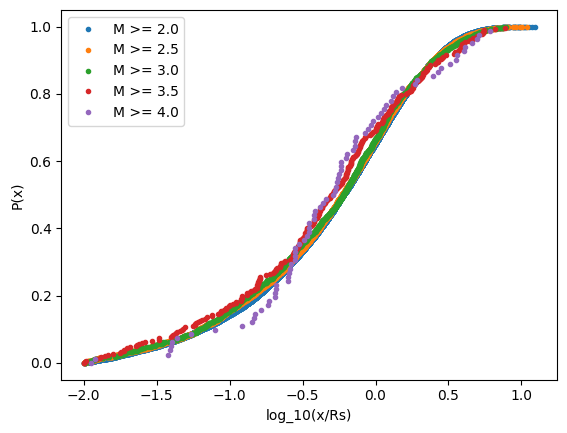

In [122]:
legend_labels = []
for j in k:
  x = np.log10((samples[0.01][j]['normalized']).astype(float))
  plt.plot(x,samples[0.01][j]['P(x)'], 'o', markersize=3)
  legend_labels.append(f'M >= {j}')

# Add legend
plt.legend(legend_labels)

# Add labels and title
plt.xlabel('log_10(x/Rs)')
plt.ylabel('P(x)')
plt.show()

# Figure 1. Some caption

In [123]:
ks_statistic, p_value = sp.stats.ks_2samp(samples[0.001][3.0]['P(x)'], samples[0.001][4.0]['P(x)'])

print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

KS Statistic: 0.011608097935897944
P-value: 1.0


In [134]:
# Getting lengths of all samples using m = 0.01
lengths = {}
lengths[0.01] = []
lengths[0.001] = []
pvals = {}
ksStats = {}

for i in m:
  pvals[i] = {}
  ksStats[i] = {}
  pvals[i] = {}
  for j in k:
    ksStats[i][j] = {}
    pvals[i][j] = {}
    lengths[i].append(len(samples[i][j]))
    for z in k:
      if z > j:
        ks_statistic, p_value = sp.stats.ks_2samp(samples[i][j]['P(x)'], samples[i][z]['P(x)'])
        pvals[i][j][z] = p_value
        ksStats[i][j][z] = ks_statistic

print('lengths')
print(lengths)
print('-------------')
print('pvals')
print(pvals)
print('-------------')
print('ksStats')
print(ksStats)
# Running KS test for all the combinations of samples except those with equal k

lengths
{0.01: [16066, 4283, 1100, 304, 82], 0.001: [16789, 4524, 1174, 327, 86]}
-------------
pvals
{0.01: {2.0: {2.5: 1.0, 3.0: 1.0, 3.5: 1.0, 4.0: 1.0}, 2.5: {3.0: 1.0, 3.5: 1.0, 4.0: 1.0}, 3.0: {3.5: 1.0, 4.0: 1.0}, 3.5: {4.0: 1.0}, 4.0: {}}, 0.001: {2.0: {2.5: 1.0, 3.0: 1.0, 3.5: 1.0, 4.0: 1.0}, 2.5: {3.0: 1.0, 3.5: 1.0, 4.0: 1.0}, 3.0: {3.5: 1.0, 4.0: 1.0}, 3.5: {4.0: 1.0}, 4.0: {}}}
-------------
ksStats
{0.01: {2.0: {2.5: 0.00046472438478225436, 3.0: 0.0017636341002456035, 3.5: 0.003289064189167079, 4.0: 0.012193603823253518}, 2.5: {3.0: 0.0016521979071593828, 3.5: 0.0032887056539317007, 4.0: 0.012192274619454109}, 3.0: {3.5: 0.003277511961722488, 4.0: 0.012172949002217295}, 3.5: {4.0: 0.012114890885750964}, 4.0: {}}, 0.001: {2.0: {2.5: 0.000425128890811477, 3.0: 0.001673238024044954, 3.5: 0.003057921826272181, 4.0: 0.011626521795139955}, 2.5: {3.0: 0.0015962566482451343, 3.5: 0.0030560760551269885, 4.0: 0.011622766434314149}, 3.0: {3.5: 0.0030554991169529405, 4.0: 0.011608097

| m = 0.01 | N | M >= 2.0 | M >= 2.5 | M >= 3.0 | M >= 3.5 | M >= 4.0 |
| --- | --- | --- | --- | --- | --- | --- |
|M >= 2.0 | 16066 | - | 100% | 100% | 100% | 100% |
|M >= 2.5 | 4283 | 0.00046 | - | 100% | 100% | 100% |
|M >= 3.0 | 1100 | 0.0018 | 0.0017 | - | 100% | 100% |
|M >= 3.5 | 304 | 0.0033 | 0.0033 | 0.0033 | - | 100% |
|M >= 4.0 | 82 | 0.012 | 0.012 | 0.012 | 0.012 | - |


| m = 0.001 | N | M >= 2.0 | M >= 2.5 | M >= 3.0 | M >= 3.5 | M >= 4.0 |
| --- | --- | --- | --- | --- | --- | --- |
|M >= 2.0 | 16789 | - | 100%  | 100%  | 100%  | 100%  |
|M >= 2.5 | 4524 | 0.00043 | - | 100%  | 100%  | 100%  |
|M >= 3.0 | 1174 | 0.0017 | 0.0016 | - | 100%  | 100%  |
|M >= 3.5 | 327 | 0.0031 | 0.0031 | 0.0031 | - | 100%  |
|M >= 4.0 | 86 | 0.012 | 0.012 | 0.012 | 0.12 | - |

your table here

Did you find any statistical significant differences between the distributions? What does it mean? Is your result identical to Correll's 2018? Why or why not? **Discuss!**

Definitely my results are not identical to Corral's, for instance I get all p-values equal to 1.0 which is great, but very very very improbable. I did not find any statistical differences between the distributions, which means they come from the same parent distribution.

### "extra credits"

**How could you _force_ a significant result?**
Organize your result for different magnitude threshold in a numpy array (it should be a 5x5 array) for both cutoffs (0.01 and 0.001). Each of these arrays should contain the p-value for the pair of distributions i,j in cell \[i\]\[j\] and \[j\]\[i\]. Use ```imshow``` to visualize this 2D data. FIrst visualize the matrix itself as done below.

In [ ]:
# your code here

pl.imshow((ks_001));
pl.axis('off')
cb = pl.colorbar()
cb.ax.set_ylabel(r'$p$-value')
pl.title("KS test results");
#add a caption


Now visualize the result as a matrix where the cells are white if the results is not statistically significant and red otherwise.
After doing it fot the set alpha threshold, lower your alpha threshold so that at least one pair of distribution has a statistically significant difference. **Warning!! this is an _unethical and horrifying practice_! Once you chose your significance threshold you are never allowed to change it! Why? Discuss**

Redoing it for threshold 0001